# SHANNON FANO CODING

In [1]:
string=input("Enter the string:")

Enter the string:The quick brown fox jumps over the lazy dog.


The quick brown fox jumps over the lazy dog.

# Probability Calculation of Symbols:-

In [2]:
from collections import Counter
def symProb(String):
    sc=dict(Counter(String.upper()));
    return {k: v / sum(sc.values()) for k, v in sc.items()}
symd=symProb(string) #symd-symbols Dictionary

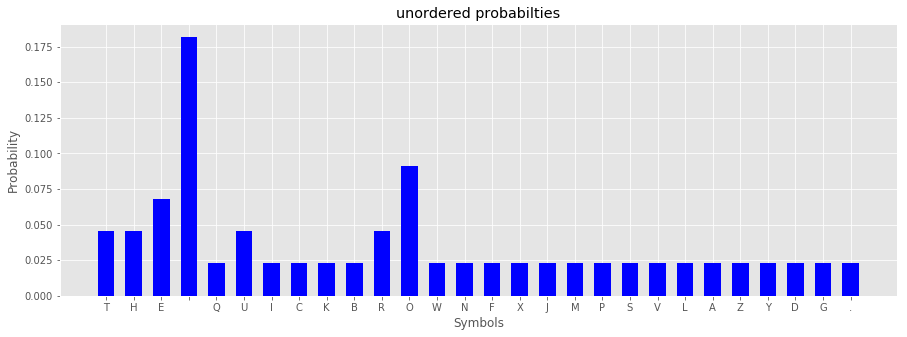

In [3]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.bar(symd.keys(),symd.values(), width=0.6, align='center',color='b')
plt.xlabel("Symbols")
plt.ylabel("Probability")
plt.title("unordered probabilties")
plt.show()

# Sorting

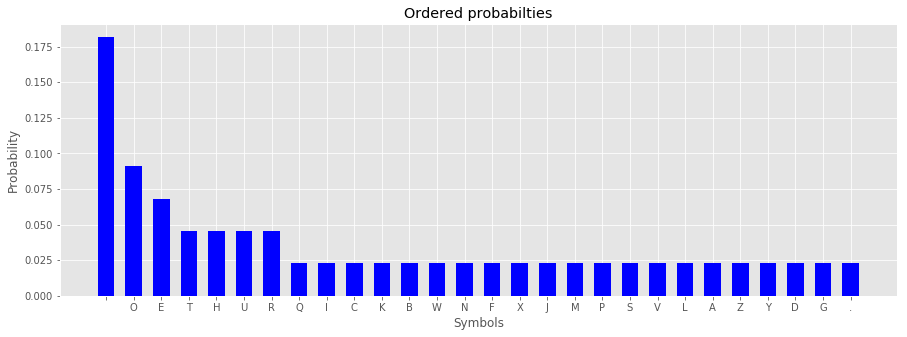

In [4]:
from collections import OrderedDict
symdn = OrderedDict(sorted(symd.items(), key=lambda kv:kv[1], reverse=True))
plt.figure(figsize=(15,5))
plt.bar(symdn.keys(),symdn.values(), width=0.6, align='center',color='b')
plt.xlabel("Symbols")
plt.ylabel("Probability")
plt.title("Ordered probabilties")
plt.show()

In [16]:
# separating keys and values of ordered dictionary
sk=list(symdn.keys())
sv=list(symdn.values())

# Partition and recursive looping

In [6]:
def best_partition(initial,final):
    pts=[]  #points
    for i in range(initial+1,final):
        diff=abs(sum(sv[initial:i])-sum(sv[i:final]))
        pts.append((diff))
        #print(abs(sum(sv[initial:i])-sum(sv[i:final])),sv[initial:i],sv[i:final],i)
        #print("\n",[sum(sv[initial:i]),sum(sv[i:final])],"\n")
    print(pts.index(min(pts))+initial)
    plt.plot([*range(initial,final-1)],pts,color="r")
    plt.scatter([*range(initial,final-1)],pts,color="k")     
    plt.scatter(initial+pts.index(min(pts)),min(pts),color='b',label="lowest point")
    plt.xlabel("Index")
    plt.ylabel("Probability")
    plt.legend() 
    plt.show()
    if pts.index(min(pts))<initial : return pts.index(min(pts))+initial; 
    else: return pts.index(min(pts))

In [7]:
def up(initial,final):
    for i in range(initial,final) : sc[i]=sc[i]+'0'
def down(initial,final):
    for i in range(initial,final) : sc[i]=sc[i]+'1'

--- stage:- 1 ----
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[(0, 28)]
5


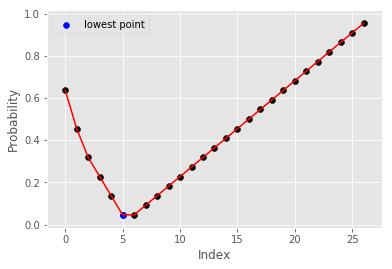



--- stage:- 2 ----
['0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
[(0, 6), (6, 28)]
1


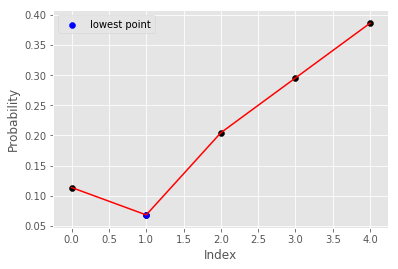

15


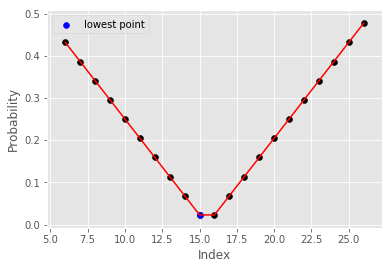



--- stage:- 3 ----
['00', '00', '01', '01', '01', '01', '10', '10', '10', '10', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11']
[(0, 2), (2, 6), (6, 10), (10, 28)]
3


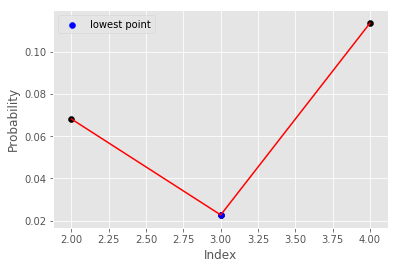

6


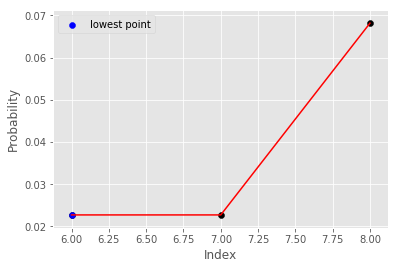

18


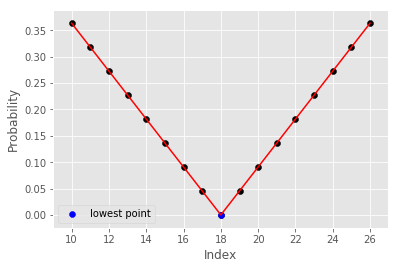



--- stage:- 4 ----
['000', '001', '010', '010', '011', '011', '100', '101', '101', '101', '110', '110', '110', '110', '110', '110', '110', '110', '110', '111', '111', '111', '111', '111', '111', '111', '111', '111']
[(2, 4), (4, 6), (6, 7), (7, 10), (10, 19), (19, 28)]
7


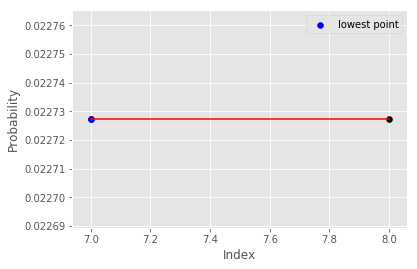

13


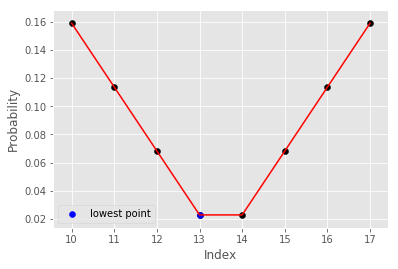

22


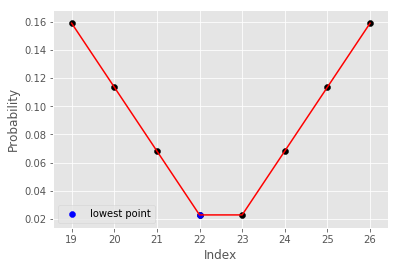



--- stage:- 5 ----
['000', '001', '0100', '0101', '0110', '0111', '100', '1010', '1011', '1011', '1100', '1100', '1100', '1100', '1101', '1101', '1101', '1101', '1101', '1110', '1110', '1110', '1110', '1111', '1111', '1111', '1111', '1111']
[(7, 8), (8, 10), (10, 14), (14, 19), (19, 23), (23, 28)]
11


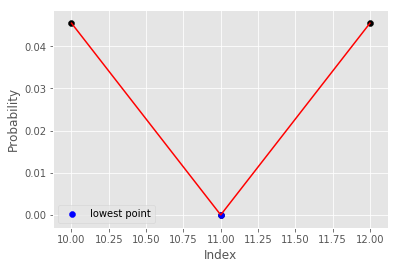

15


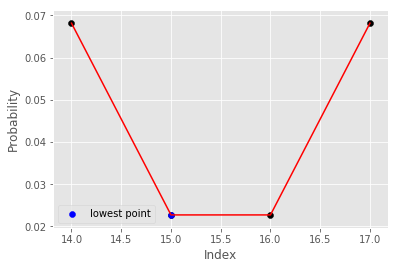

20


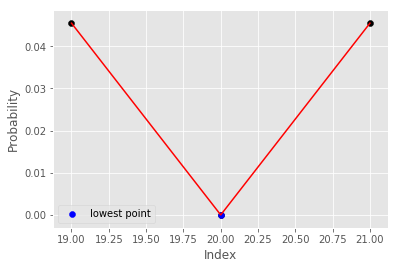

24


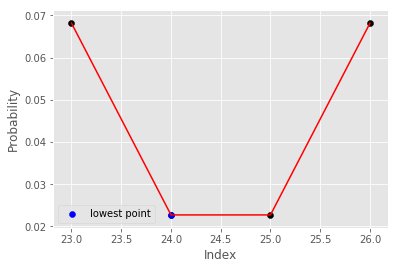



--- stage:- 6 ----
['000', '001', '0100', '0101', '0110', '0111', '100', '1010', '10110', '10111', '11000', '11000', '11001', '11001', '11010', '11010', '11011', '11011', '11011', '11100', '11100', '11101', '11101', '11110', '11110', '11111', '11111', '11111']
[(10, 12), (12, 14), (14, 16), (16, 19), (19, 21), (21, 23), (23, 25), (25, 28)]
16


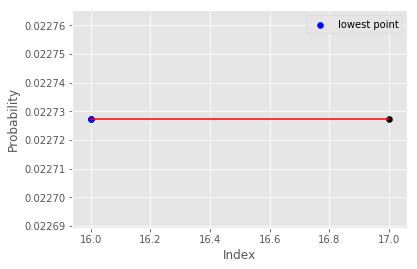

25


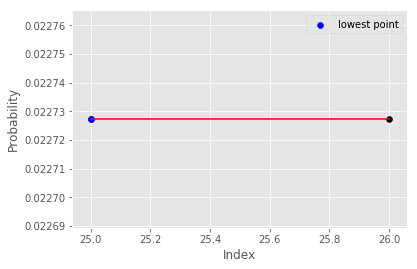



--- stage:- 7 ----
['000', '001', '0100', '0101', '0110', '0111', '100', '1010', '10110', '10111', '110000', '110001', '110010', '110011', '110100', '110101', '110110', '110111', '110111', '111000', '111001', '111010', '111011', '111100', '111101', '111110', '111111', '111111']
[(16, 17), (17, 19), (25, 26), (26, 28)]


--- stage:- 8 ----
['000', '001', '0100', '0101', '0110', '0111', '100', '1010', '10110', '10111', '110000', '110001', '110010', '110011', '110100', '110101', '110110', '1101110', '1101111', '111000', '111001', '111010', '111011', '111100', '111101', '111110', '1111110', '1111111']
[]


In [8]:
initial=0
final=len(sv)
sc=['']*(len(sv))
current_index=[(initial,final)]
new_index=[]
stage=1
while current_index!=[]:
    print("---","stage:-",stage,"----");print(sc);new_index=[];print(current_index)
    for index in current_index:
            if (index[1]-index[0])==2: sc[index[0]]=sc[index[0]]+'0'; sc[index[1]-1]=sc[index[1]-1]+'1';
                
            if (index[1]-index[0])>2:
                index_ptr=best_partition(index[0],index[1])+1;
                new_index.append((index[0],index_ptr));up(index[0],index_ptr);
                new_index.append((index_ptr,index[1]));down(index_ptr,index[1]);
            current_index=new_index
    print("\n") 
    stage=stage+1
# for last stage 
if current_index==[]:
    print("---","stage:-",stage,"----");print(sc);new_index=[];print(current_index)

In [9]:
dummy=[]
for i in range(0,len(sv)):dummy.append((sk[i],sc[i]));
encoded_dictionary=OrderedDict(dummy)    

In [10]:
import pandas as pd
data={'Symbol':sk,'probability':sv,'codeword':sc,}
df=pd.DataFrame(data)
df.head(len(sk))

,Symbol,codeword,probability
0,,000,0.181818
1,O,001,0.090909
2,E,0100,0.068182
3,T,0101,0.045455
4,H,0110,0.045455
5,U,0111,0.045455
6,R,100,0.045455
7,Q,1010,0.022727
8,I,10110,0.022727
9,C,10111,0.022727


# Encoded Message

In [11]:
encoded_message=''.join(sc)
print("For message:-",string,"\nEncoded message is:-",encoded_message)

For message:- The quick brown fox jumps over the lazy dog. 
Encoded message is:- 0000010100010101100111100101010110101111100001100011100101100111101001101011101101101110110111111100011100111101011101111110011110111111011111101111111


# Entropy Calculation:-

In [12]:
import math
H=0
for i in range(0,len(sv)):H=H+sv[i]*math.log((1/sv[i]),2);
print("Entropy is:-",H,"bits/message")

Entropy is:- 4.442275084497219 bits/message


# Average Codeword Length

In [13]:
L=0
for i in range(0,len(sc)):L=L+len(sc[i])*sv[i];
print("Average Codeword length is:-",L,"bits/message")

Average Codeword length is:- 4.636363636363637 bits/message


# Compression

In [14]:
print("Coding efficiency is :-",(H/L)*100)

Code efficiency is :- 95.81377633229296
